<a href="https://colab.research.google.com/github/chinmayp995/CS-203-Assignment-5/blob/main/Team20_a5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Tools and Technique: Assignment 5   


Team 20

Chinmay Pendse (23110245)


Dakshata Bhamare(23210027)


## Pre preparation

In [ ]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 50.3 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=be42ad1c84a1ed5812367f92b7d5e26cd40d903794c2d85e95b0e737ebf8f7ed
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
#unzipping test.zip to get all the dataset from kaggle
!unzip test.zip

Archive:  test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: __MACOSX/cats/._cat_190.jpg  
  inflating: cats/cat_147.jpg        
  inflating: __MACOSX/cats/._cat_147.jpg  
  inflating: cats/cat_542.jpg        
  inflating: __MACOSX/cats/._cat_542.jpg  
  inflating: cats/cat_595.jpg        
  inflating: __MACOSX/cats/._cat_595.jpg  
  inflating: cats/cat_422.jpg        
  inflating: __MACOSX/cats/._cat_422.jpg  
  inflating: cats/cat_583.jpg        
  inflating: __MACOSX/cats/._cat_583.jpg  
  inflating: cats/cat_384.jpg        
  inflating: __MACOSX/cats/._cat_384.jpg  
  inflating: cats/cat_586.jpg        
  inflating: __MACOSX/cats/._cat_586.jpg  
  inflating: cats/cat_545.jpg        
  inflating: __MACOSX/cats/._cat_545.jpg  
  inflating: cats/cat_223.jpg        
  inflating: __MACOSX/cats/._cat_223.jpg  
  inflating: cats/cat_551.jpg        
  inflating: __MACOSX/cats/._cat_551.jpg  
  inflating: cats/cat_587.jpg        
  inflating: __MACOSX/cats/._cat_

In [ ]:
#mounting with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1

In [ ]:
import os   #importing libraries
import shutil
import random
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from PIL import Image
import augly.image as imaugs
import augly.utils as utils
import matplotlib.pyplot as plt

In [ ]:
# getting all the datasets paths in their folders and subfolders
cats_dataset_path = "/content/cats" #getting data from kaggle
dogs_dataset_path = "/content/dogs"

train_path = "/content/drive/MyDrive/dataset/train"
test_path = "/content/drive/MyDrive/dataset/test"

os.makedirs(train_path, exist_ok=True)  # if directories dont exist this will ensure that they are created
os.makedirs(test_path, exist_ok=True)

cat_train_path="/content/drive/MyDrive/dataset/train/cat"
cat_test_path="/content/drive/MyDrive/dataset/test/cat"
dog_train_path="/content/drive/MyDrive/dataset/train/dog"
dog_test_path="/content/drive/MyDrive/dataset/test/dog"

os.makedirs(cat_train_path, exist_ok=True)
os.makedirs(cat_test_path, exist_ok=True)
os.makedirs(dog_train_path, exist_ok=True)
os.makedirs(dog_test_path, exist_ok=True)

### Creating the Test Train Split

In [ ]:
# get all image files within the directories
cat_images = glob(os.path.join(cats_dataset_path, '*.jpg'))
dog_images = glob(os.path.join(dogs_dataset_path, '*.jpg'))

# creating the train test split
cat_train_images, cat_test_images = train_test_split(cat_images, test_size=0.2, random_state=42)
dog_train_images, dog_test_images = train_test_split(dog_images, test_size=0.2, random_state=42)

# copy images to respective directories
for img in cat_train_images:
    shutil.copy(img, os.path.join(cat_train_path, os.path.basename(img)))
for img in cat_test_images:
    shutil.copy(img, os.path.join(cat_test_path, os.path.basename(img)))
for img in dog_train_images:
    shutil.copy(img, os.path.join(dog_train_path, os.path.basename(img)))
for img in dog_test_images:
    shutil.copy(img, os.path.join(dog_test_path, os.path.basename(img)))

### Plotting the Graphs for original dataset

This Graph shows the total train and test split

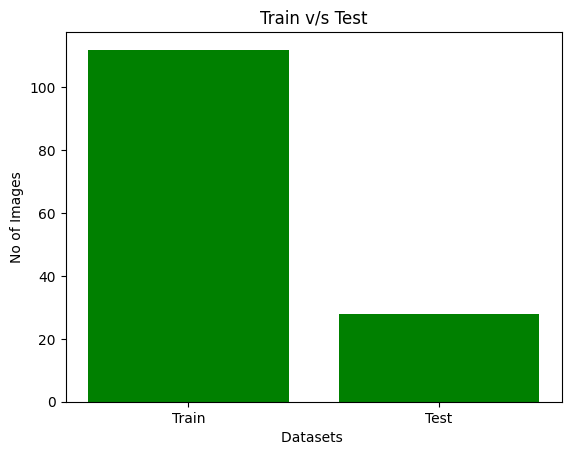

In [ ]:
y_ticks=["Train","Test"]

# we add the cat_train and dog _train to obtain the total train and same for the test

heights=[len(cat_train_images)+len(dog_train_images),len(cat_test_images)+len(dog_test_images)]
plt.bar(y_ticks,heights,color='g')
plt.title("Train v/s Test")
plt.xlabel('Datasets ')
plt.ylabel('No of Images')
plt.show()

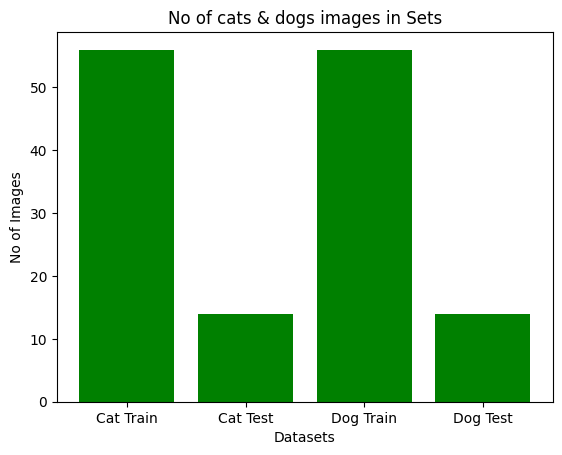

In [ ]:
#checking data

y_ticks=["Cat Train","Cat Test","Dog Train","Dog Test"]
heights=[len(cat_train_images),len(cat_test_images),len(dog_train_images),len(dog_test_images)]
plt.bar(y_ticks,heights,color='g')
plt.xlabel('Datasets')
plt.ylabel('No of Images')
plt.title("No of cats & dogs images in Sets")
plt.show()

### Data Augmentation

In [ ]:
#defining a function which makes changes in the images and augmnents the dataset
def augment_image(img_path):
    img = Image.open(img_path).convert("RGB")

    #we make a list which has 10 different types of augly functions
    aug_list = [
        imaugs.Rotate(degrees=random.uniform(-30, 30)),
        imaugs.Crop( x1=0.25, y1=0.25, x2=0.75, y2=0.75),
        imaugs.Blur(radius=random.uniform(1, 3)),
        imaugs.ColorJitter(brightness_factor=0.5, contrast_factor=0.5),
        imaugs.RandomEmojiOverlay(opacity=0.8),
        imaugs.OverlayText(text=[79, 66, 332, 903, 46], font_size=0.2),
        imaugs.PerspectiveTransform(sigma=1.0),
        imaugs.HFlip(),
        imaugs.VFlip(),
        imaugs.RandomNoise()
    ]

    # now we Apply 3 random augmentations in sequence
    aug_img = img
    for aug in random.sample(aug_list, 3):
      aug_img = aug(aug_img)

    return aug_img

applying the functions on the dataset

In [ ]:
#on cats
cat_augmented_images = []
cat_train_images = glob(os.path.join(cat_train_path, "*.jpg"))
cat_augmented_path = "/content/drive/MyDrive/dataset_augmented/cat_train_augmented"
os.makedirs(cat_augmented_path, exist_ok=True)

#on dogs
dog_augmented_images=[]
dog_train_images= glob(os.path.join(dog_train_path, "*.jpg"))
dog_augmented_path = "/content/drive/MyDrive/dataset_augmented/dog_train_augmented"
os.makedirs(dog_augmented_path, exist_ok=True)

In [ ]:
# this fixes the deprecated numpy float usage in future use
np.float = float

for img_path in cat_train_images:
    for i in range(2):  # this makes twice the dataset size
        aug_img = augment_image(img_path)
        new_filename = os.path.join(cat_augmented_path, f"cat_aug_{i}_" + os.path.basename(img_path))
        aug_img.save(new_filename)
        cat_augmented_images.append(new_filename) #updating into the list

for img_path in dog_train_images:
    for i in range(2):  # twice the dataset size
        aug_img = augment_image(img_path)
        new_filename = os.path.join(dog_augmented_path, f"dog_aug_{i}_" + os.path.basename(img_path))
        aug_img.save(new_filename)
        dog_augmented_images.append(new_filename) #updating into list

Previous Cat Train Images: 56
Previous Dog Train Images: 56
Augmented Cat Images: 112
Augmented Dog Images: 112
Total Original Train Dataset: 112
Total Augmented Dataset: 224


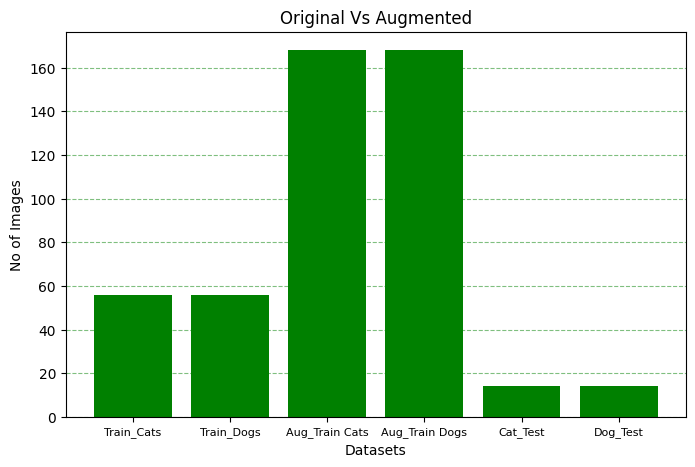

In [ ]:
# counting original images
cat_original_count = len(glob(os.path.join(cat_train_path, "*.jpg")))
dog_original_count = len(glob(os.path.join(dog_train_path, "*.jpg")))

# counting augmented images
cat_augmented_count = len(glob(os.path.join(cat_augmented_path, "*.jpg")))
dog_augmented_count = len(glob(os.path.join(dog_augmented_path, "*.jpg")))

# printing statistics

print(f"Previous Cat Train Images: {cat_original_count}")
print(f"Previous Dog Train Images: {dog_original_count}")
print(f"Augmented Cat Images: {cat_augmented_count}")
print(f"Augmented Dog Images: {dog_augmented_count}")

total_original = cat_original_count + dog_original_count
total_augmented = cat_augmented_count + dog_augmented_count

print(f"Total Original Train Dataset: {total_original}")
print(f"Total Augmented Dataset: {total_augmented}")

# preparing data for plots
categories = ['Train_Cats', 'Train_Dogs', 'Aug_Train Cats', 'Aug_Train Dogs','Cat_Test','Dog_Test']
counts = [cat_original_count, dog_original_count, cat_augmented_count + cat_original_count,
          dog_augmented_count + dog_original_count, len(cat_test_images),len(dog_test_images)]

# Plotting bar graph
plt.figure(figsize=(8, 5))
plt.bar(categories, counts,color='g')
plt.xlabel('Datasets')
plt.ylabel('No of Images')
plt.title('Original Vs Augmented')
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5,color='g')
plt.show()



### Having a Look at Augmented images

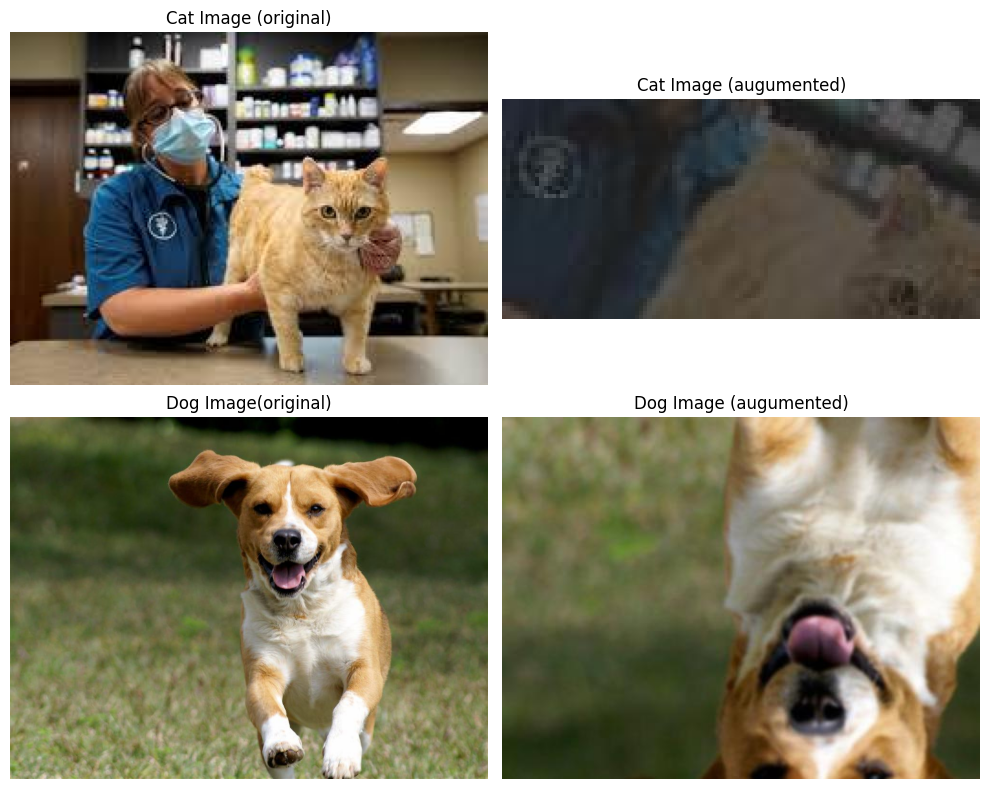

In [ ]:
dog_ori = Image.open('/content/drive/MyDrive/dataset/train/dog/dog_155.jpg')
dog_aug = Image.open('/content/drive/MyDrive/dataset_augmented/dog_train_augmented/dog_aug_0_dog_155.jpg')

cat_ori = Image.open('/content/drive/MyDrive/dataset/train/cat/cat_244.jpg')
cat_aug = Image.open('/content/drive/MyDrive/dataset_augmented/cat_train_augmented/cat_aug_0_cat_244.jpg')

# making subplots for images
plt.figure(figsize=(10, 8))

# cat images
plt.subplot(2, 2, 1)
plt.title("Cat Image (original)")
plt.imshow(cat_ori)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Cat Image (augumented)")
plt.imshow(cat_aug)
plt.axis('off')

# dog images
plt.subplot(2, 2, 3)
plt.title("Dog Image(original)")
plt.imshow(dog_ori)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Dog Image (augumented)")
plt.imshow(dog_aug)
plt.axis('off')

plt.tight_layout()
plt.show()


# Task 2

In [ ]:
#importing neccesary libraries for model training and evaluation

import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from transformers import ResNetForImageClassification, AutoImageProcessor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob
from glob import glob as original_glob   #renaming the function to avoid potential conflicts
import os
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch.nn.functional as F

In [ ]:
# here we define xavier_uniform intialization because we are not sure about the weights

def init_xavier_uniform(module):
    if isinstance(module, (nn.Linear, nn.Conv2d)):
        nn.init.xavier_uniform_(module.weight)
        if module.bias is not None:
            torch.nn.init.zeros_(module.bias)

In [ ]:
# load model with new random weights

model_name = "microsoft/resnet-50"

from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_name, num_labels=2)
model = ResNetForImageClassification(config)
model.apply(init_xavier_uniform)

# loading image processor for preprocessing
processor = AutoImageProcessor.from_pretrained(model_name)

print("Model initialized with new weights")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Model initialized with new weights


### Configuration for the Model

In [ ]:
model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "microsoft/resnet-50",
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.48.2"
}

### Architecture Diagram for Model Resnet 50

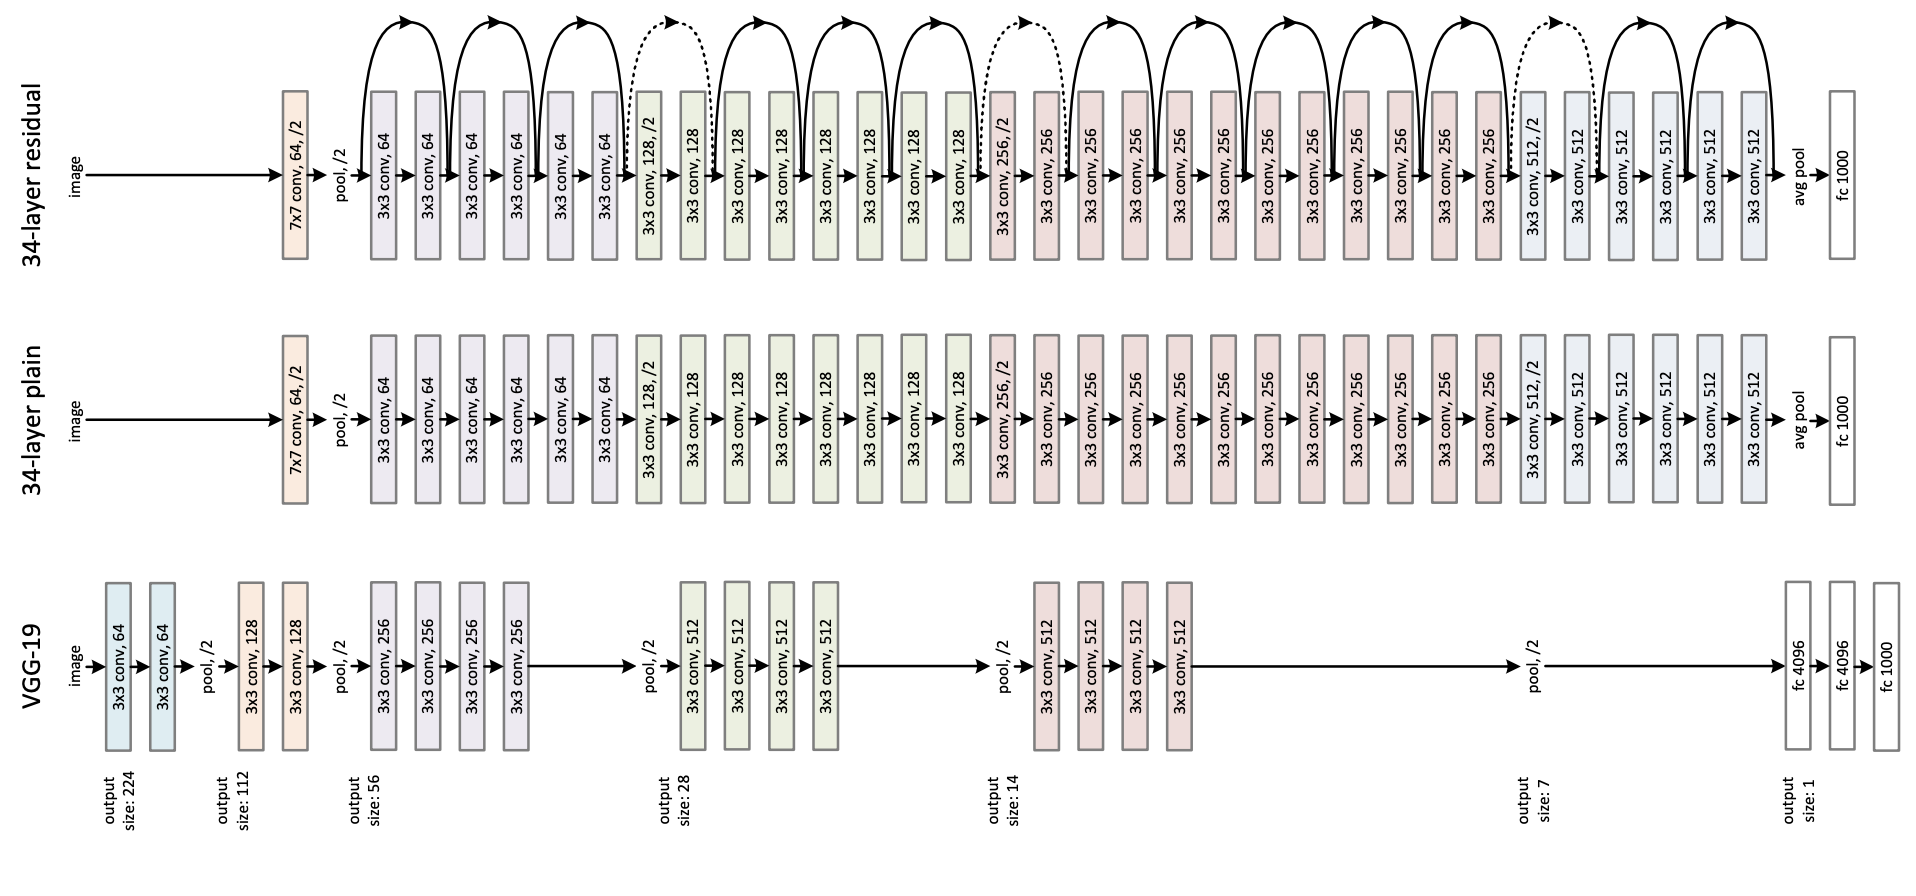

In [ ]:
# defining dataset class
class CatDogDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
            img_path = self.image_paths[idx]
            label = self.labels[idx]

            try:
                # Open image and convert to RGB
                image = Image.open(img_path).convert("RGB")
            except Exception as e:
                print(f"Error loading image: {img_path}, Error: {e}")
                return None, None

            # Apply transformations if provided
            if self.transform:
                image = self.transform(image)

            return image, label

# defining transformations (standard for ResNet-50)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# geting image paths
cat_images = original_glob("/content/drive/MyDrive/dataset/train/cat/*.jpg")
dog_images = original_glob("/content/drive/MyDrive/dataset/train/dog/*.jpg")

cat_labels = [0] * len(cat_images)
dog_labels = [1] * len(dog_images)

# combining cats & dogs
train_images = cat_images+dog_images
train_labels = cat_labels + dog_labels

# #shuffling to diversify the data
# combined = list(zip(train_images, train_labels))
# random.shuffle(combined)
# train_images, train_labels = zip(*combined)

#defining the labels for test of cats and dogs
test_cat_labels=[0]*len(cat_test_images)
test_dog_labels=[1]*len(dog_test_images)

#creating test module
test_images = cat_test_images+dog_test_images
test_labels = test_cat_labels + test_dog_labels

# dataloaders
train_dataset = CatDogDataset(train_images, train_labels, transform)
test_dataset = CatDogDataset(test_images, test_labels, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("dataLoader preparation completed")


dataLoader preparation completed


We move the model to the fastest training platform (CPU/GPU)




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [ ]:
# defined loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
# Training loop
def train_model(model, train_loader, num_epochs=1):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

In [ ]:
# train the model for original dataset
train_model(model, train_loader)
print("Training without augumentation completed!")

Epoch [1/5], Loss: 4.0095
Epoch [2/5], Loss: 4.4119
Epoch [3/5], Loss: 2.3824
Epoch [4/5], Loss: 1.1164
Epoch [5/5], Loss: 0.8577
Training without augumentation completed!


In [ ]:
#evaluting the model through the defination
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            probabilities = F.softmax(outputs, dim=1)
            _, preds = torch.max(probabilities, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, precision, recall, f1,all_labels,all_preds

In [ ]:

accuracy_no_aug, precision_no_aug, recall_no_aug, f1_no_aug,all_labels,all_preds = evaluate_model(model, test_loader)

print(f"Accuracy: {accuracy_no_aug * 100:.4f}%")
print(f"Precision: {precision_no_aug * 100:.4f}%")
print(f"Recall: {recall_no_aug * 100:.4f}%")
print(f"F1 Score: {f1_no_aug * 100:.4f}%")

Accuracy: 54.1667%
Precision: 56.3158%
Recall: 54.1667%
F1 Score: 49.9051%


### On Augmented Dataset

In [ ]:
# load model with new random weights for augumentation dataset training
model_name = "microsoft/resnet-50"

config = AutoConfig.from_pretrained(model_name, num_labels=2)
aug_model = ResNetForImageClassification(config)
aug_model.init_weights()

# Load image processor for preprocessing
processor = AutoImageProcessor.from_pretrained(model_name)

print("Augumentated Model initialized with new weights")


Augumentated Model initialized with new weights


In [ ]:
#we now get the labels for the new augmented images
aug_cat_labels = [0] * len(cat_augmented_images)
aug_dog_labels = [1] * len(dog_augmented_images)

#We add all required to get data for model
train_aug_images = list(train_images) + cat_augmented_images + dog_augmented_images
train_aug_labels = list(train_labels) + aug_cat_labels + aug_dog_labels

# #again we do random shuffling
# combined = list(zip(train_aug_images, train_aug_labels))
# random.shuffle(combined)
# train_aug_images, train_aug_labels = zip(*combined)

#loading the data
train_aug_dataset = CatDogDataset(train_aug_images, train_aug_labels, transform)
train_aug_loader = DataLoader(train_aug_dataset, batch_size=32, shuffle=True)

print("dataLoader Augumentation preparation completed")


dataLoader Augumentation preparation completed


In [ ]:
train_aug_loader

In [ ]:
# train the model on augumented data
aug_model.to(device)
train_model(aug_model, train_aug_loader)
print("Training with augumentation completed!")


Epoch [1/1], Loss: 0.8454
Training with augumentation completed!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset class
class CatDogDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image: {img_path}, Error: {e}")
            return None, None

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Augmented image labels
aug_cat_labels = [0] * len(cat_augmented_images)
aug_dog_labels = [1] * len(dog_augmented_images)

# Combine original and augmented data
train_aug_images = list(train_images) + cat_augmented_images + dog_augmented_images
train_aug_labels = list(train_labels) + aug_cat_labels + aug_dog_labels

# Check for class balance
print(f"Total Cats: {train_aug_labels.count(0)}, Total Dogs: {train_aug_labels.count(1)}")

# Shuffle data
combined = list(zip(train_aug_images, train_aug_labels))
random.shuffle(combined)
train_aug_images, train_aug_labels = zip(*combined)

# Create dataset and dataloader
train_aug_dataset = CatDogDataset(train_aug_images, train_aug_labels, transform)
train_aug_loader = DataLoader(train_aug_dataset, batch_size=32, shuffle=True)

print("DataLoader with augmentation prepared successfully!")

# Define model, loss, and optimizer
model = aug_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train_model(model, train_loader, num_epochs=1):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            if images is None:  # Skip faulty images
                continue

            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            # Extract raw logits explicitly
            outputs = model(images)
            if hasattr(outputs, 'logits'):  # Check if logits exist
                outputs = outputs.logits

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


print("Starting training...")
train_model(model, train_aug_loader)
print("Training with augmentation completed successfully!")


Total Cats: 168, Total Dogs: 168
DataLoader with augmentation prepared successfully!
Starting training...
Epoch [1/1], Loss: 0.7889, Accuracy: 48.21%
Training with augmentation completed successfully!


In [ ]:
model.eval()

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [ ]:
vimport torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            if hasattr(outputs, 'logits'):  # Fix model output
                outputs = outputs.logits

            _, preds = torch.max(outputs, 1)  # Remove softmax

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Debugging: Check unique predictions and labels
    print("Unique predictions:", set(all_preds))
    print("Unique labels:", set(all_labels))

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1, all_labels, all_preds


In [ ]:
accuracy_aug, precision_aug, recall_aug, f1_aug, all_labels, all_preds = evaluate_model(model, test_loader)

print(f"Accuracy: {accuracy_aug * 100:.4f}%")
print(f"Precision: {precision_aug * 100:.4f}%")
print(f"Recall: {recall_aug * 100:.4f}%")
print(f"F1 Score: {f1_aug * 100:.4f}%")

Unique predictions: {0}
Unique labels: {0, 1}
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
F1 Score: 33.3333%


In [ ]:
print("First 20 Predictions:", all_preds[:])
print("First 20 Actual Labels:", all_labels[:])


First 20 Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 20 Actual Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from collections import Counter
# Create labels for augmented images
aug_cat_labels = [0] * len(cat_augmented_images)
aug_dog_labels = [1] * len(dog_augmented_images)

# Combine the lists
train_aug_images = list(train_images) + cat_augmented_images + dog_augmented_images
train_aug_labels = list(train_labels) + aug_cat_labels + aug_dog_labels

# Shuffle the training data
combined = list(zip(train_aug_images, train_aug_labels))
random.shuffle(combined)
train_aug_images, train_aug_labels = zip(*combined)
train_aug_images = list(train_aug_images)
train_aug_labels = list(train_aug_labels)

# --- Create training Dataset ---
train_dataset = CatDogDataset(train_aug_images, train_aug_labels, transform=transform)

# --- Examine label distribution ---
label_counts = Counter(train_aug_labels)
print("Training label distribution:", label_counts)

# --- Create a WeightedRandomSampler to balance the classes ---
# Compute a weight for each sample: weight = 1 / (frequency of its class)
weights = [1.0 / label_counts[label] for label in train_aug_labels]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# --- Create DataLoader using the sampler ---
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)

# --- Create test Dataset and DataLoader ---
# (Assuming test_images and test_labels are defined)
test_dataset = CatDogDataset(test_images, test_labels, transform=standard_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ============================================================
# 5. Define the Model, Loss Function, and Optimizer
# ============================================================
# Use a pretrained ResNet-50 and modify the final layer for 2 classes.
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

# --- Define weighted loss ---
# Calculate class weights (making misclassifying the minority class more expensive)
total_samples = len(train_aug_labels)
class_weights = [total_samples / label_counts[i] for i in sorted(label_counts.keys())]
print("Class weights for loss:", class_weights)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# --- Define optimizer ---
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ============================================================
# 6. Training Function
# ============================================================
def train_model(model, train_loader, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)  # ResNet50 returns logits directly
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = (correct / total) * 100
        print(f"Epoch [{epoch+1}/ {num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# ============================================================
# 7. Evaluation Function
# ============================================================
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"Test F1 Score: {f1:.2f}\n")

    return accuracy, precision, recall, f1

# ============================================================
# 8. Run Training and Evaluation
# ============================================================
print("Starting training...\n")
train_model(model, train_loader, num_epochs=5)
print("\nTraining complete!")

print("\nEvaluating on test set...")
evaluate_model(model, test_loader)

Training label distribution: Counter({0: 168, 1: 168})


NameError: name 'WeightedRandomSampler' is not defined

##Interpretation